In [5]:
import numpy as np
import pandas as pd

# Load the dataset (assuming you have downloaded the Apple stock dataset from Kaggle)
# Replace 'apple_stock_data.csv' with the path to your dataset file
data = pd.read_csv('/content/AAPL.csv')

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())

# Let's assume the 'Close' price column is of interest for the analysis
close_prices = data['Close']

# Calculate mean
mean_value = np.mean(close_prices)
print(f"Mean of the 'Close' prices: {mean_value}")

# Calculate median
median_value = np.median(close_prices)
print(f"Median of the 'Close' prices: {median_value}")

# Calculate mode (Note: mode returns multiple values if there are ties)
mode_value = pd.Series(close_prices).mode()
print(f"Mode of the 'Close' prices: {mode_value}")

# Calculate standard deviation
std_dev = np.std(close_prices)
print(f"Standard deviation of the 'Close' prices: {std_dev}")


First few rows of the dataset:
         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600
Mean of the 'Close' prices: 14.76353296264807
Median of the 'Close' prices: 0.475446
Mode of the 'Close' prices: 0    0.399554
Name: Close, dtype: float64
Standard deviation of the 'Close' prices: 31.927964031199433


In [16]:
import numpy as np
import pandas as pd

# Load the TikTok dataset (replace 'tiktok_data.csv' with your actual file path)
data = pd.read_csv('/content/tiktok_performance.csv')

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())

# Basic Operations:

# 1. Summary statistics (mean, median, mode, standard deviation) for video views
views = data['Views']

mean_views = np.mean(views)
median_views = np.median(views)
mode_views = data['Views'].mode()
std_views = np.std(views)

print(f"Mean Views: {mean_views}")
print(f"Median Views: {median_views}")
print(f"Mode Views: {mode_views}")
print(f"Standard Deviation of Views: {std_views}")

# 2. Adding a new column for engagement rate (likes + comments + shares) / views
data['engagement_rate'] = (data['Likes'] + data['Comments'] + data['Shares']) / data['Views']

print("\nFirst few rows with the Engagement Rate column:")
print(data[['Video_ID', 'Views', 'Likes', 'Comments', 'Shares', 'engagement_rate']].head())

# Intermediate Operations:

# 3. Filter videos with more than 1 million views
videos_above_million = data[data['Views'] > 1_000_000]
print("\nVideos with more than 1 million views:")
print(videos_above_million[['Video_ID', 'Views', 'Likes']].head())

# 4. Group videos by the number of shares and calculate the average views and likes
grouped_by_shares = data.groupby('Shares').agg({
    'Views': 'mean',
    'Likes': 'mean'
})

print("\nAverage views and likes by the number of shares:")
print(grouped_by_shares.head())

# Advanced Operations:

# 5. Correlation between views, likes, shares, and comments
correlation_matrix = data[['Views', 'Likes', 'Shares', 'Comments']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# 6. Normalize the views column using Min-Max scaling
data['views_normalized'] = (data['Views'] - data['Views'].min()) / (data['Views'].max() - data['Views'].min())

print("\nFirst few rows with normalized views:")
print(data[['Video_ID', 'Views', 'views_normalized']].head())

# 7. Apply a custom function using np.vectorize (e.g., categorize videos based on engagement rate)
def categorize_engagement(rate):
    if rate > 0.1:
        return 'High Engagement'
    elif rate > 0.05:
        return 'Medium Engagement'
    else:
        return 'Low Engagement'

# Apply categorization
data['engagement_category'] = np.vectorize(categorize_engagement)(data['engagement_rate'])

print("\nFirst few rows with engagement categories:")
print(data[['Video_ID', 'engagement_rate', 'engagement_category']].head())

# 8. Pivot table to analyze engagement categories and their average views
pivot_table = pd.pivot_table(data, values='Views', index='engagement_category', aggfunc=np.mean)
print("\nPivot table for engagement categories and average views:")
print(pivot_table)


First few rows of the dataset:
   Video_ID  User_ID Username      Video_Title  Category  Likes  Comments  \
0       101        1    user1  Dance Challenge     Dance   1500       120   
1       102        2    user2       Funny Skit    Comedy   2300       200   
2       103        3    user3         Tutorial  Tutorial   1200       150   
3       104        4    user4      Viral Dance     Dance   4500       500   
4       105        5    user5    Comedy Sketch    Comedy   1800       180   

   Shares  Views Upload_Date  Video_Length   Hashtags  User_Followers  \
0     300  50000  2024-08-01            30     #dance            1500   
1     400  70000  2024-08-02            45     #funny            2000   
2     250  40000  2024-08-03            60  #tutorial            1200   
3     600  90000  2024-08-04            30     #viral            1800   
4     210  50000  2024-08-05            45    #comedy            1500   

   User_Following  User_Likes  
0             300        5000  
1  

<ipython-input-16-4b26787e346f>:77: FutureWarning: The provided callable <function mean at 0x7b889e241000> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(data, values='Views', index='engagement_category', aggfunc=np.mean)


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<ipython-input-17-49350e28603a>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='fare', data=data, ci=None, palette='Blues')
<ipython-input-17-49350e28603a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='fare', data=data, ci=None, palette='Blues')


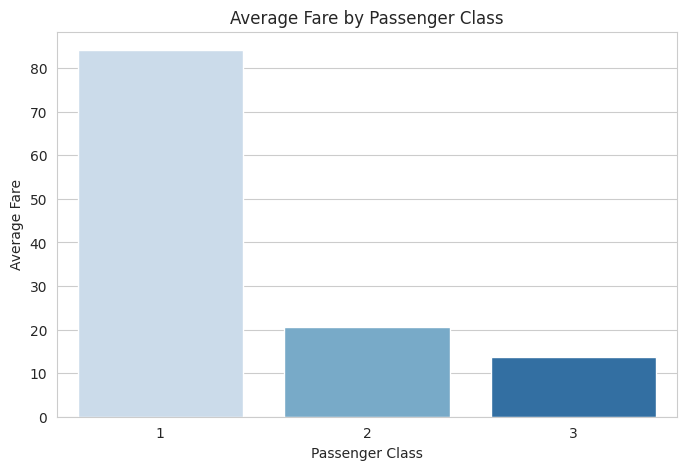

<ipython-input-17-49350e28603a>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age', y='survived', data=data, ci=None)


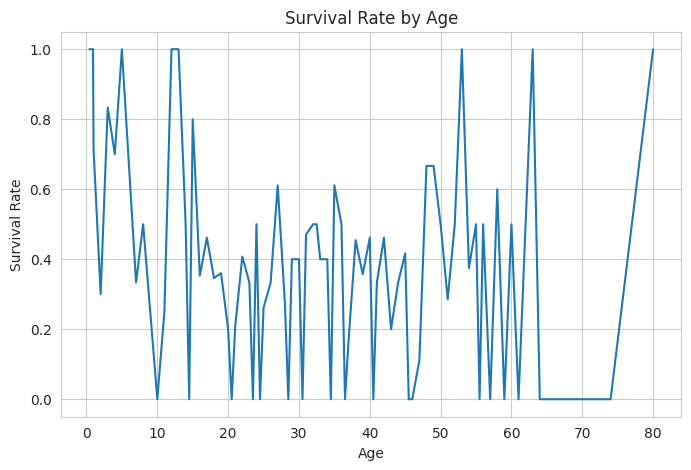

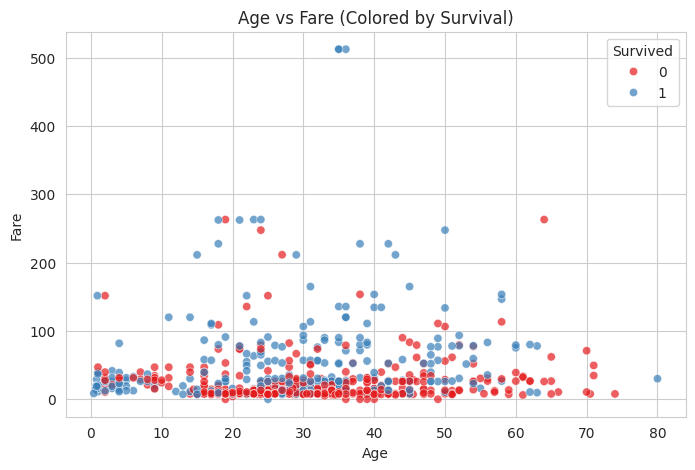

<ipython-input-17-49350e28603a>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='age', data=data, palette='Set2')


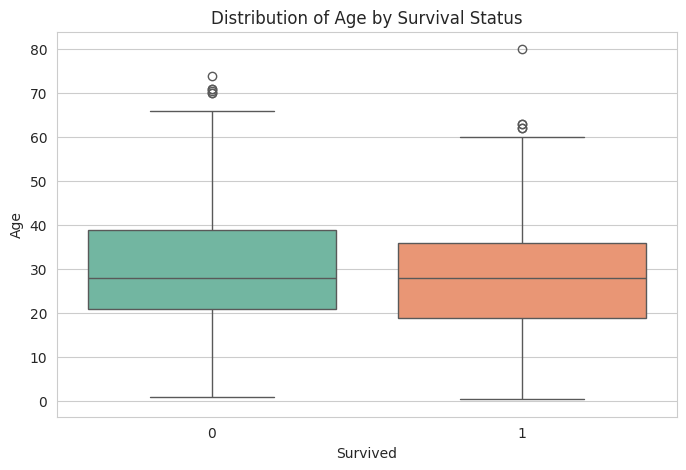

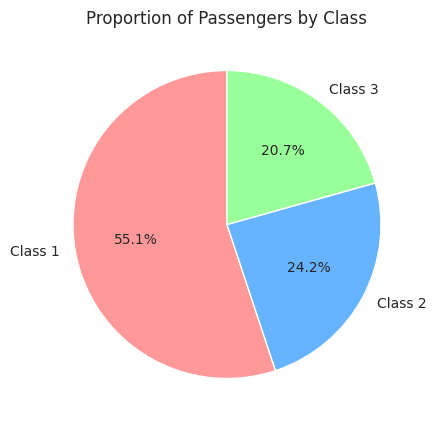

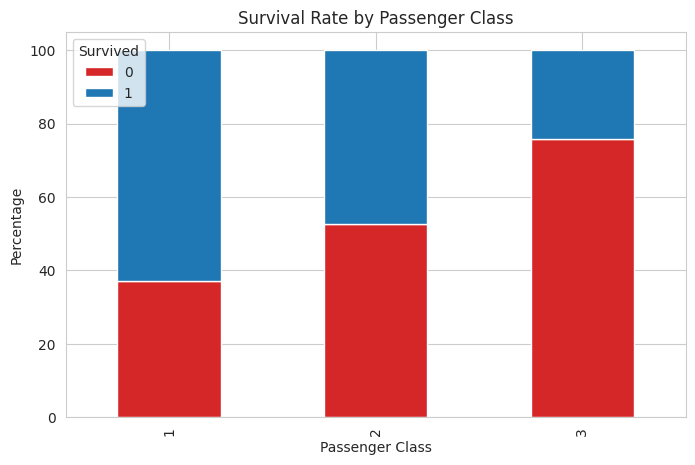

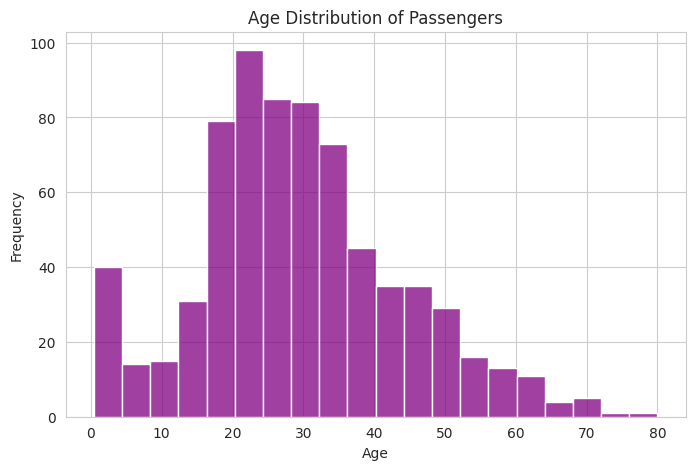

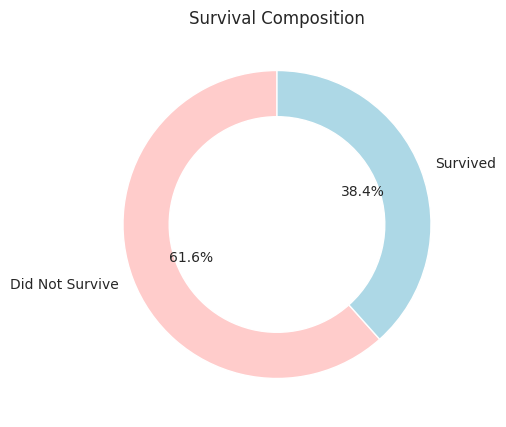

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset from seaborn (you can replace it with your own dataset)
data = sns.load_dataset('titanic')

# Display the first few rows to understand the structure
print(data.head())

# Set the style for the plots
sns.set_style('whitegrid')

# 1. Comparison Plots

# 1.1 Bar plot: Comparing the average fare by passenger class (Pclass)
plt.figure(figsize=(8, 5))
sns.barplot(x='pclass', y='fare', data=data, ci=None, palette='Blues')
plt.title('Average Fare by Passenger Class')
plt.ylabel('Average Fare')
plt.xlabel('Passenger Class')
plt.show()

# 1.2 Line plot: Survival rate by age
plt.figure(figsize=(8, 5))
sns.lineplot(x='age', y='survived', data=data, ci=None)
plt.title('Survival Rate by Age')
plt.ylabel('Survival Rate')
plt.xlabel('Age')
plt.show()

# 1.3 Scatter plot: Age vs Fare with different survival statuses
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='fare', hue='survived', data=data, palette='Set1', alpha=0.7)
plt.title('Age vs Fare (Colored by Survival)')
plt.ylabel('Fare')
plt.xlabel('Age')
plt.legend(title='Survived')
plt.show()

# 1.4 Box plot: Distribution of age by survival status
plt.figure(figsize=(8, 5))
sns.boxplot(x='survived', y='age', data=data, palette='Set2')
plt.title('Distribution of Age by Survival Status')
plt.ylabel('Age')
plt.xlabel('Survived')
plt.show()

# 2. Composition Plots

# 2.1 Pie chart: Proportion of passengers in different classes
class_counts = data['pclass'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(class_counts, labels=['Class 1', 'Class 2', 'Class 3'], autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Proportion of Passengers by Class')
plt.show()

# 2.2 Stacked Bar Plot: Composition of survivors and non-survivors by passenger class
survival_by_class = pd.crosstab(data['pclass'], data['survived'], normalize='index') * 100
survival_by_class.plot(kind='bar', stacked=True, color=['#d62728', '#1f77b4'], figsize=(8, 5))
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Percentage')
plt.xlabel('Passenger Class')
plt.legend(title='Survived', loc='upper left')
plt.show()

# 2.3 Histogram: Age distribution of passengers
plt.figure(figsize=(8, 5))
sns.histplot(data['age'].dropna(), kde=False, color='purple', bins=20)
plt.title('Age Distribution of Passengers')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

# 2.4 Donut chart: Survival composition
survived_counts = data['survived'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(survived_counts, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['#ffcccb', '#add8e6'], wedgeprops=dict(width=0.3))
plt.title('Survival Composition')
plt.show()


In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patelris/crop-yield-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/patelris/crop-yield-prediction-dataset/versions/1


           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


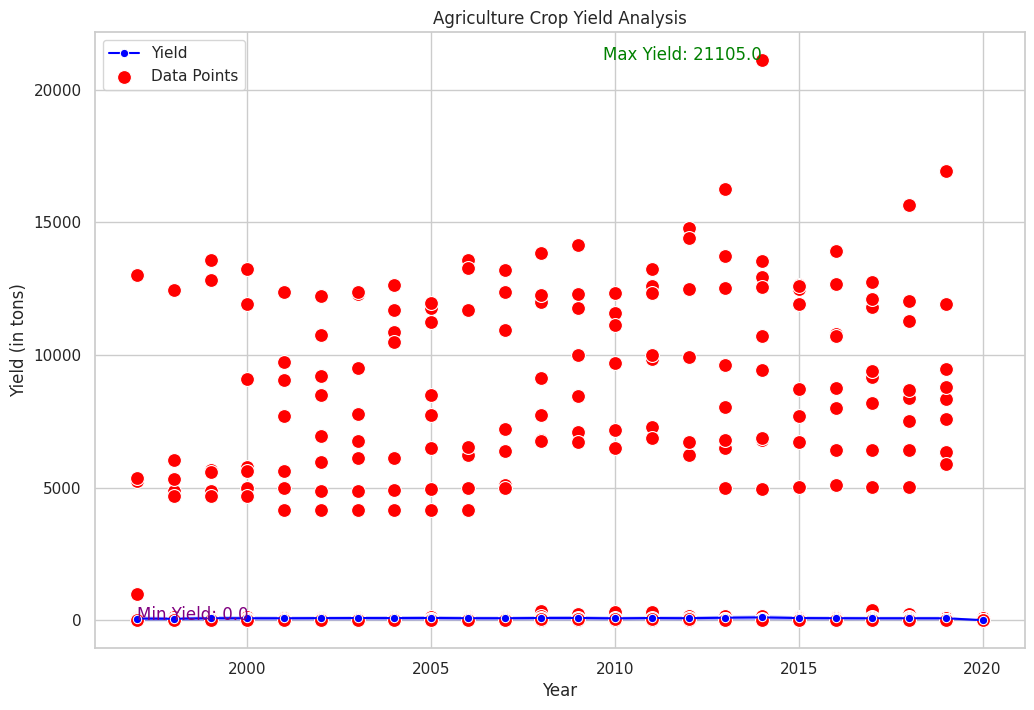

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/crop_yield.csv')

# Display the first few rows to understand structure
print(data.head())

# Set up the plot size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Line plot to show the trend of Yield over the Years
sns.lineplot(x='Crop_Year', y='Yield', data=data, color='blue', marker='o', label='Yield')

# Scatter plot to highlight individual data points
sns.scatterplot(x='Crop_Year', y='Yield', data=data, color='red', s=100, label='Data Points')

# Adding title and labels
plt.title("Agriculture Crop Yield Analysis")
plt.xlabel("Year")
plt.ylabel("Yield (in tons)")

# Identifying max and min points and adding text annotations
max_yield_year = data.loc[data['Yield'].idxmax(), 'Crop_Year']
max_yield = data['Yield'].max()
min_yield_year = data.loc[data['Yield'].idxmin(), 'Crop_Year']
min_yield = data['Yield'].min()

plt.text(max_yield_year, max_yield, f"Max Yield: {max_yield}", ha='right', color='green')
plt.text(min_yield_year, min_yield, f"Min Yield: {min_yield}", ha='left', color='purple')

# Adding legend
plt.legend(loc="upper left")

# Show the plot
plt.show()


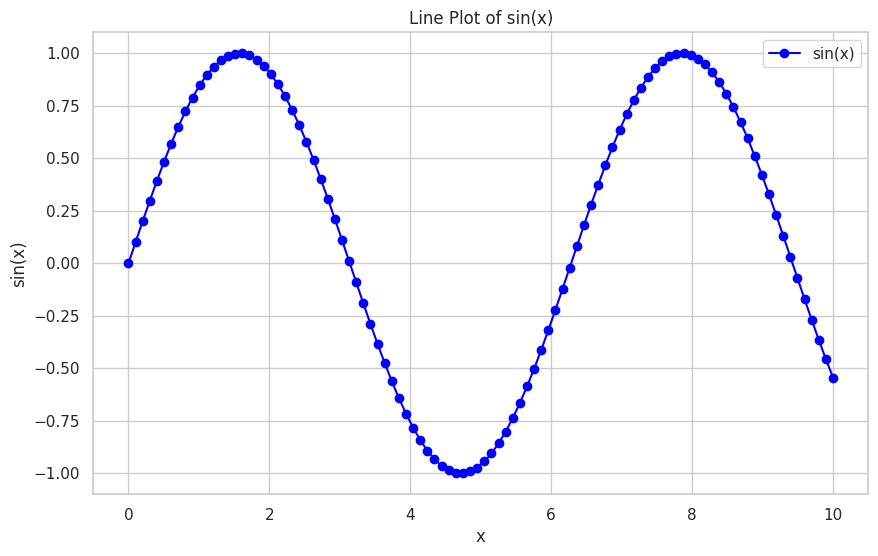

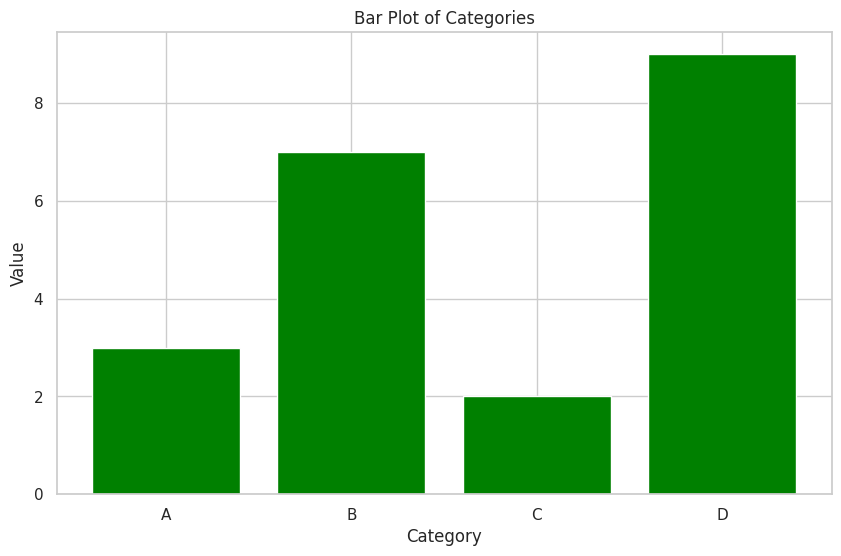

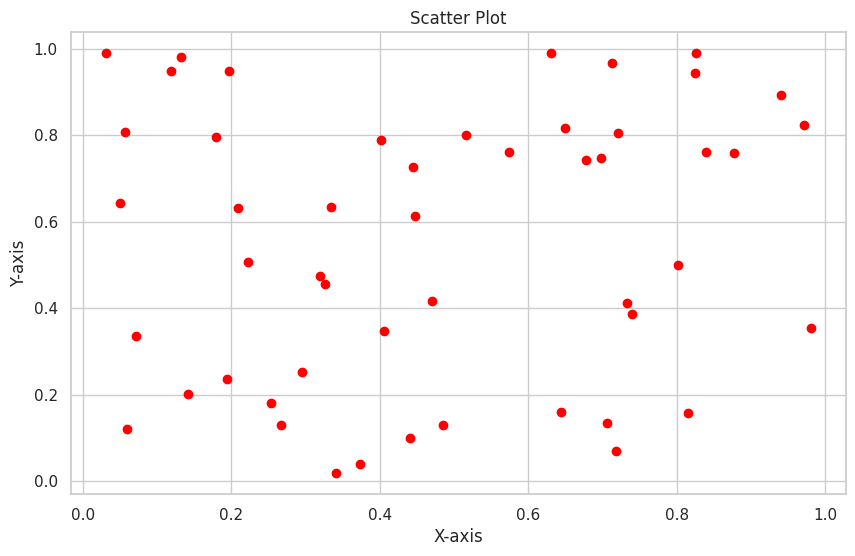

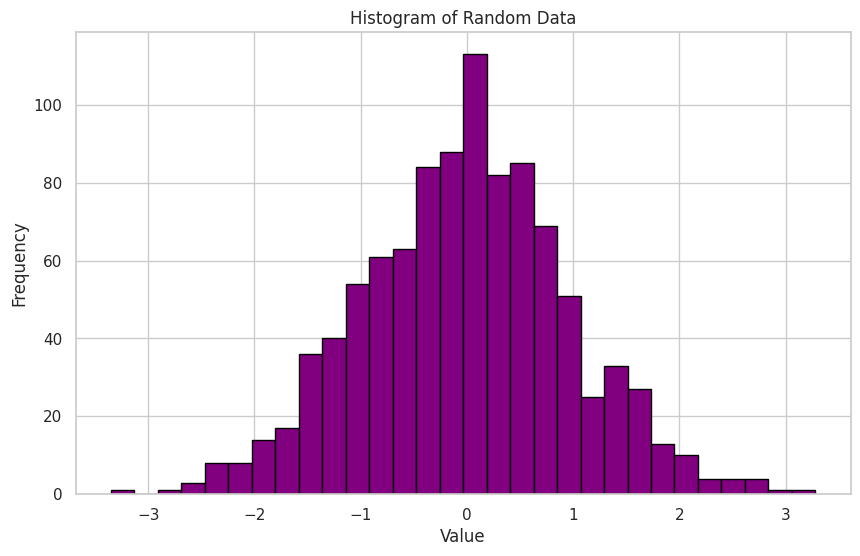

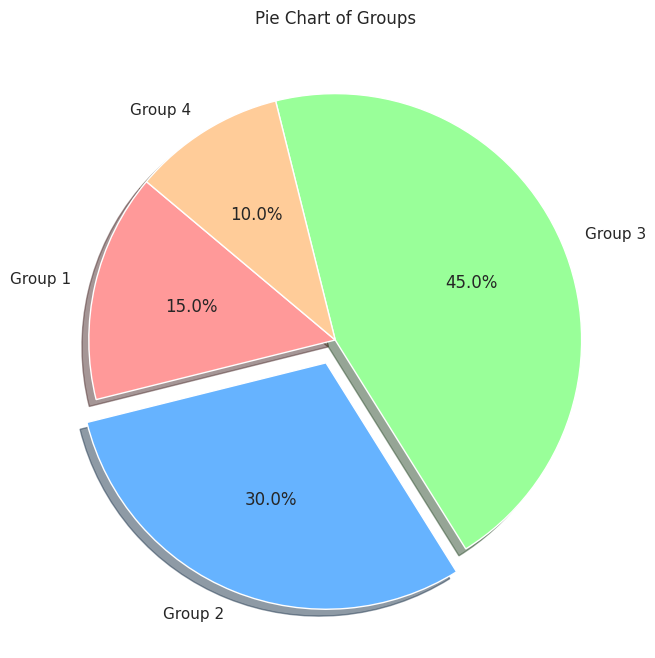

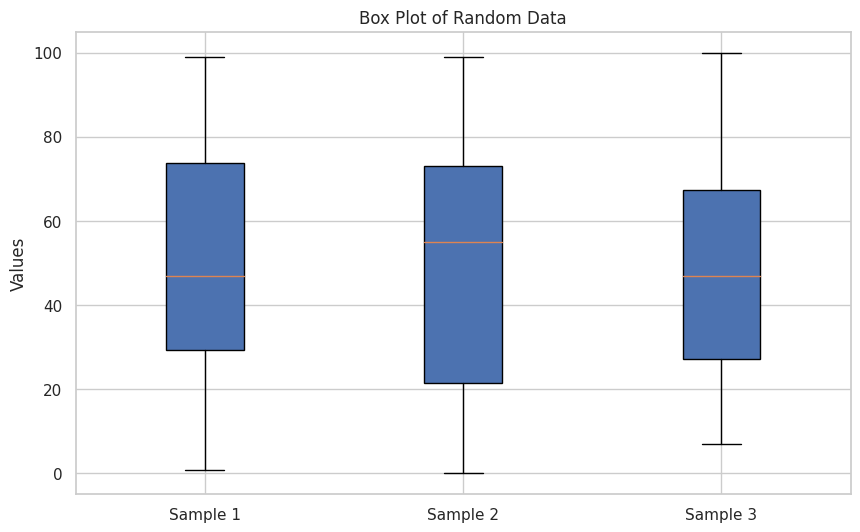

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

categories = ['A', 'B', 'C', 'D']
values = [3, 7, 2, 9]
sizes = [15, 30, 45, 10]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
explode = [0, 0.1, 0, 0]

# 1. Line Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="sin(x)", color='blue', marker='o')
plt.title("Line Plot of sin(x)")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid(True)
plt.legend()
plt.show()

# 2. Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='green')
plt.title("Bar Plot of Categories")
plt.xlabel("Category")
plt.ylabel("Value")
plt.show()

# 3. Scatter Plot
x_scatter = np.random.rand(50)
y_scatter = np.random.rand(50)
plt.figure(figsize=(10, 6))
plt.scatter(x_scatter, y_scatter, color='red')
plt.title("Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

# 4. Histogram
data = np.random.randn(1000)
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, color='purple', edgecolor='black')
plt.title("Histogram of Random Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# 5. Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Pie Chart of Groups")
plt.show()

# 6. Box Plot
data_boxplot = [np.random.rand(50) * 100, np.random.rand(50) * 100, np.random.rand(50) * 100]
plt.figure(figsize=(10, 6))
plt.boxplot(data_boxplot, patch_artist=True, labels=['Sample 1', 'Sample 2', 'Sample 3'])
plt.title("Box Plot of Random Data")
plt.ylabel("Values")
plt.show()
